In [8]:
# 所有包导入成功，现在开始数据分析！
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

print(" 环境就绪。开始酒店数据分析项目..")

# 加载数据
df = pd.read_csv('hotel_bookings.csv')
print(f" 数据加载成功。共有 {len(df)} 行记录")

# 显示数据前3行，快速了解数据结构
print("\n数据预览：")
df.head(3)

 环境就绪。开始酒店数据分析项目..
 数据加载成功。共有 119390 行记录

数据预览：


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,0,342,2024,July,30,27,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2024-07-27 22:16:40.916332324,Chandigarh
1,Resort Hotel - Mumbai,0,737,2024,April,17,28,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2024-04-28 21:56:21.507509066,Mumbai
2,Resort Hotel - Delhi,0,7,2024,September,37,10,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2024-09-10 03:46:25.734029096,Delhi


In [9]:
# 数据清洗
df_clean = df.copy()

print(" 开始数据清洗")

# 处理缺失值
df_clean['children'].fillna(0, inplace=True)
df_clean['country'].fillna('Unknown', inplace=True)
df_clean['agent'].fillna(0, inplace=True)
df_clean['company'].fillna(0, inplace=True)

# 删除没有客人的异常记录
df_clean = df_clean[df_clean['adults'] + df_clean['children'] + df_clean['babies'] > 0]

print("数据清洗完成")
print(f"原始数据: {len(df)} 行 → 清洗后: {len(df_clean)} 行")

 开始数据清洗
数据清洗完成
原始数据: 119390 行 → 清洗后: 119210 行


 重要业务发现：酒店整体取消率为 37.08%


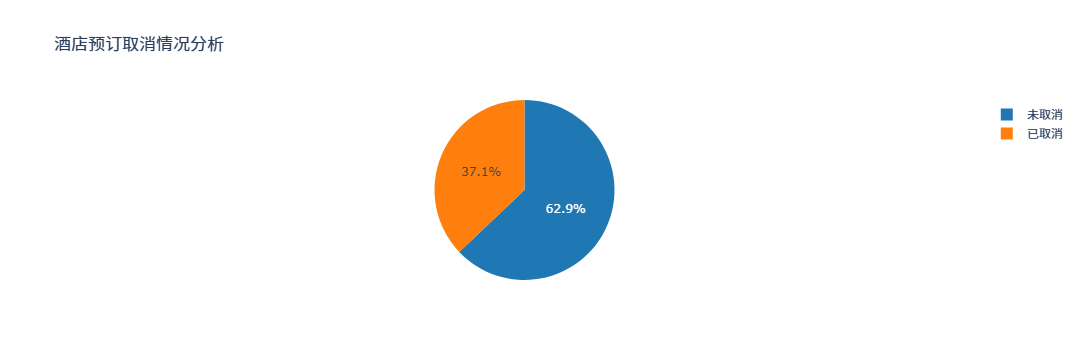

In [10]:
# 分析取消率
cancel_rate = df_clean['is_canceled'].mean() * 100
print(f" 重要业务发现：酒店整体取消率为 {cancel_rate:.2f}%")

# 创建交互式饼图
fig = px.pie(values=df_clean['is_canceled'].value_counts().values,
             names=['未取消', '已取消'],
             title='酒店预订取消情况分析',
             color=['未取消', '已取消'],
             color_discrete_map={'未取消':'#1f77b4', '已取消':'#ff7f0e'})
fig.show()

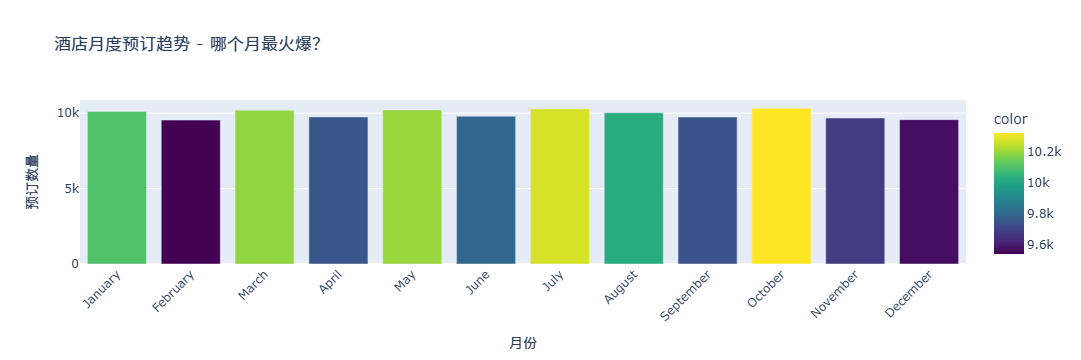

 最繁忙的月份是: October


In [11]:
# 看看哪个月是旺季
monthly_bookings = df_clean['arrival_date_month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

fig = px.bar(x=monthly_bookings.index, y=monthly_bookings.values,
             title='酒店月度预订趋势 - 哪个月最火爆？',
             labels={'x': '月份', 'y': '预订数量'},
             color=monthly_bookings.values,
             color_continuous_scale='viridis')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# 找出最繁忙的月份
busiest_month = monthly_bookings.idxmax()
print(f" 最繁忙的月份是: {busiest_month}")

In [14]:
df_clean.to_csv('cleaned_hotel_data.csv', index=False)
print("清洗后的数据已保存")

清洗后的数据已保存


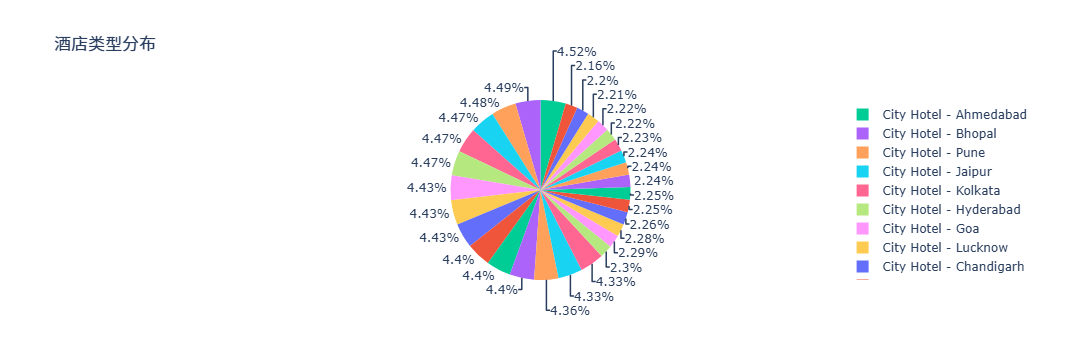

 酒店类型分布：
  City Hotel - Ahmedabad: 5391 预订 (4.5%)
  City Hotel - Bhopal: 5358 预订 (4.5%)
  City Hotel - Pune: 5335 预订 (4.5%)
  City Hotel - Jaipur: 5328 预订 (4.5%)
  City Hotel - Kolkata: 5327 预订 (4.5%)
  City Hotel - Hyderabad: 5327 预订 (4.5%)
  City Hotel - Goa: 5286 预订 (4.4%)
  City Hotel - Lucknow: 5280 预订 (4.4%)
  City Hotel - Chandigarh: 5277 预订 (4.4%)
  City Hotel - Mumbai: 5248 预订 (4.4%)
  City Hotel - Chennai: 5247 预订 (4.4%)
  City Hotel - Delhi: 5240 预订 (4.4%)
  City Hotel - Bangalore: 5199 预订 (4.4%)
  City Hotel - Kochi: 5161 预订 (4.3%)
  City Hotel - Indore: 5159 预订 (4.3%)
  Resort Hotel - Bhopal: 2737 预订 (2.3%)
  Resort Hotel - Delhi: 2725 预订 (2.3%)
  Resort Hotel - Kochi: 2723 预订 (2.3%)
  Resort Hotel - Jaipur: 2693 预订 (2.3%)
  Resort Hotel - Bangalore: 2686 预订 (2.3%)
  Resort Hotel - Chandigarh: 2684 预订 (2.3%)
  Resort Hotel - Goa: 2676 预订 (2.2%)
  Resort Hotel - Chennai: 2674 预订 (2.2%)
  Resort Hotel - Mumbai: 2669 预订 (2.2%)
  Resort Hotel - Indore: 2657 预订 (2.2%)
  Resort 

In [15]:
# 分析酒店类型分布
hotel_type_count = df_clean['hotel'].value_counts()

fig = px.pie(values=hotel_type_count.values,
             names=hotel_type_count.index,
             title='酒店类型分布',
             color=hotel_type_count.index,
             color_discrete_map={'Resort Hotel':'lightblue', 'City Hotel':'lightgreen'})
fig.show()

print(f" 酒店类型分布：")
for hotel_type, count in hotel_type_count.items():
    percentage = (count / len(df_clean)) * 100
    print(f"  {hotel_type}: {count} 预订 ({percentage:.1f}%)")

C:\Users\bokee\AppData\Local\Temp\ipykernel_29972\4263347306.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



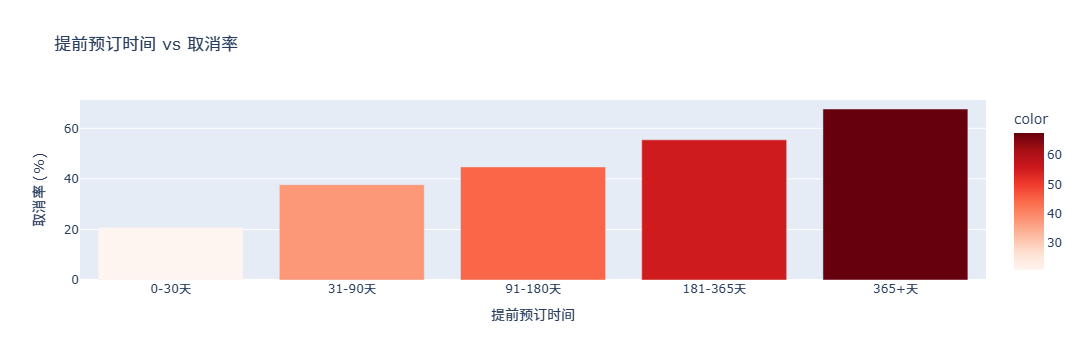

 提前预订时间分析：
  0-30天: 20.9% 取消率
  31-90天: 37.7% 取消率
  91-180天: 44.7% 取消率
  181-365天: 55.5% 取消率
  365+天: 67.7% 取消率


In [16]:
# 分析提前预订时间与取消率的关系
import plotly.graph_objects as go

# 按提前时间分组分析取消率
df_clean['lead_time_group'] = pd.cut(df_clean['lead_time'], 
                                    bins=[0, 30, 90, 180, 365, 1000],
                                    labels=['0-30天', '31-90天', '91-180天', '181-365天', '365+天'])

cancel_by_lead = df_clean.groupby('lead_time_group')['is_canceled'].mean() * 100

fig = px.bar(x=cancel_by_lead.index, y=cancel_by_lead.values,
             title='提前预订时间 vs 取消率',
             labels={'x': '提前预订时间', 'y': '取消率 (%)'},
             color=cancel_by_lead.values,
             color_continuous_scale='reds')
fig.show()

print(" 提前预订时间分析：")
for group, rate in cancel_by_lead.items():
    print(f"  {group}: {rate:.1f}% 取消率")

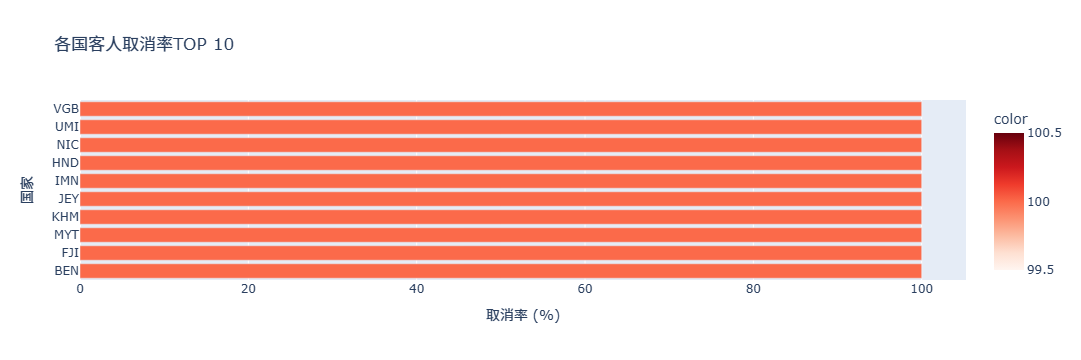

In [17]:
# 进阶分析：不同客源国的取消率差异
country_cancel = df_clean.groupby('country')['is_canceled'].mean().sort_values(ascending=False).head(10)

fig = px.bar(y=country_cancel.index, x=country_cancel.values * 100,
             title='各国客人取消率TOP 10',
             labels={'x': '取消率 (%)', 'y': '国家'},
             orientation='h',
             color=country_cancel.values * 100,
             color_continuous_scale='reds')
fig.show()